In [73]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [5]:
with open('./transactions_gas_details','r') as f:
    data = f.readlines()

for i in range(len(data)):
    data[i] = data[i].strip().split(',')
ltrans = data[0]
rtrans = data[1:]
for i in range(len(ltrans)):
    print(i,ltrans[i])

0 block_number
1 tx_hash
2 tx_from
3 tx_to
4 tx_value
5 tx_gas_price
6 tx_gas
7 receipt_gas_used
8 receipt_status
9 block_transaction_count
10 block_miner
11 block_hash
12 block_gas_used


In [6]:
with open('./Blockdata_ico_running_label.csv','r') as f:
    data = f.readlines()
for i in range(len(data)):
    data[i] = data[i].strip().split(',')
lblocks = data[0]
rblocks = data[1:]
for i in range(len(lblocks)):
    print(i,lblocks[i])

0 X
1 block_number
2 block_transaction_count
3 block_size
4 block_gas_used
5 miners_label


In [29]:
miners = {}
for r in rblocks:
    miner = r[5]
    if miner in miners:
        miners[miner].append(r[1])
    else:
        miners[miner] = [r[1]]

In [77]:
blocks = {}
fBlocks = {}
for i in range(len(rblocks)):
    blocks[rblocks[i][1]] = {'transCount':0,
                            'success':0,
                             'fail':0
                            }
    fBlocks[rblocks[i][1]] = []

In [78]:
notinlist = []

for r in rtrans:
    bn = r[0]        
    if bn in blocks:
        fBlocks[bn].append(r)
        blocks[bn]['transCount'] += 1
        tx_gas = int(r[6])
        receipt_gas_used = int(r[7])
        if tx_gas > receipt_gas_used:
            blocks[bn]['success'] +=1
        elif tx_gas == receipt_gas_used:
            blocks[bn]['fail'] +=1
        else:
            print('oooo')
    else:
        notinlist.append(bn)
print(set(notinlist))

{'3908030', '3903899'}


In [83]:
for bn in blocks:
    if blocks[bn]['transCount'] > 0:
        blocks[bn]['successRate'] = blocks[bn]['success'] / blocks[bn]['transCount']
    else:
        blocks[bn]['successRate'] = -1

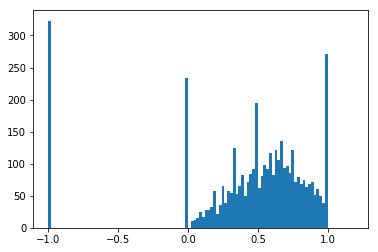

In [32]:
dist = []
for bn in blocks:
#     if blocks[bn]['successRate'] >= 0:
    dist.append(blocks[bn]['successRate'])

n, bins, patches=plt.hist(dist,bins=np.arange(-1,1.2,0.02))
# print(n, bins, patches)
plt.show()

In [37]:
def drawHist(miner,dist,bins=np.arange(-1,300)):
    plt.clf()
    plt.hist(dist,bins=bins)
    plt.xlabel('transaction_count')
    plt.ylabel('block_count')
    plt.title(miner)
#     plt.axis([-5, 300, 0, 150])
#     plt.savefig(miner+'.png')
    plt.show()

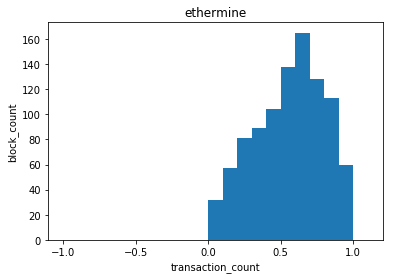

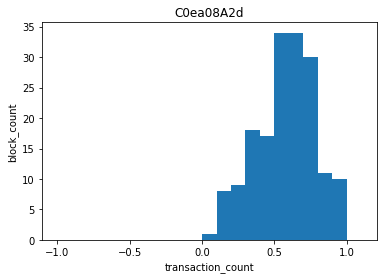

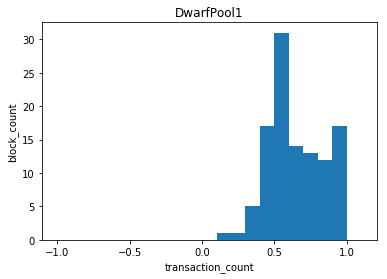

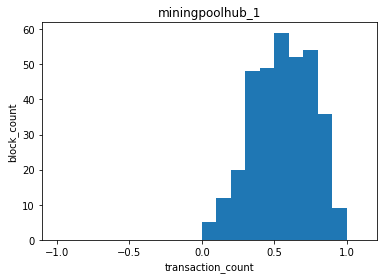

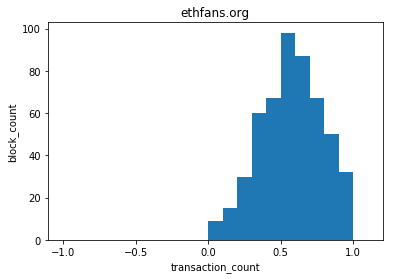

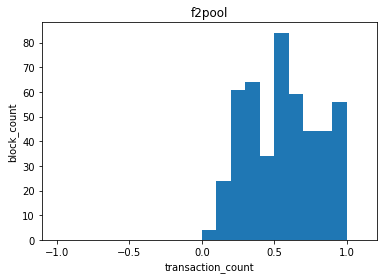

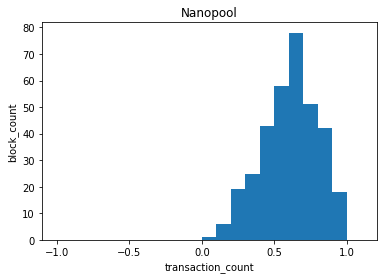

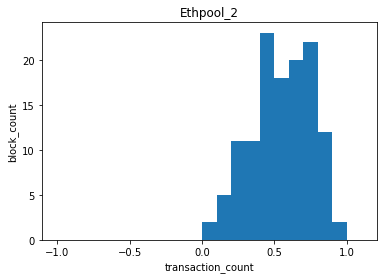

In [44]:
for miner in miners:
    if len(miners[miner]) > 100:
        dist = []
        for bn in miners[miner]:
            if blocks[bn]['successRate'] > 0 and blocks[bn]['successRate'] < 1:
                dist.append(blocks[bn]['successRate'])
        drawHist(miner,dist,np.arange(-1,1.2,0.1))

In [62]:
for miner in miners:
    c = 0
    cc = 0
    if len(miners[miner]) > 100:
        for bn in miners[miner]:

            if blocks[bn]['transCount'] > 0:
                if blocks[bn]['successRate'] == 0:
                    c += 1
                cc += 1
        print("{:>3} {:>3} {:0.3f} {:}".format(c,cc,c/cc,miner))

  7 980 0.007 ethermine
  2 174 0.011 C0ea08A2d
 11 128 0.086 DwarfPool1
  5 353 0.014 miningpoolhub_1
  9 526 0.017 ethfans.org
194 886 0.219 f2pool
  2 344 0.006 Nanopool
  0 126 0.000 Ethpool_2


In [63]:
for miner in miners:
    c = 0
    cc = 0
    if len(miners[miner]) > 100:
        for bn in miners[miner]:

            if blocks[bn]['transCount'] > 0:
                if blocks[bn]['successRate'] == 1:
                    c += 1
                cc += 1
        print("{:>3} {:>3} {:0.3f} {:}".format(c,cc,c/cc,miner))

  6 980 0.006 ethermine
  0 174 0.000 C0ea08A2d
  6 128 0.047 DwarfPool1
  4 353 0.011 miningpoolhub_1
  2 526 0.004 ethfans.org
218 886 0.246 f2pool
  1 344 0.003 Nanopool
  0 126 0.000 Ethpool_2


In [69]:
print(len(miners['f2pool']))

1036


In [91]:
for bn in miners['f2pool']:
    if blocks[bn]['successRate'] == 1:
        for r in fBlocks[bn]:
            print(r[2:5])
        print()

['0x00a6e8338caa05d310859819b1dcc0b02d091c2c', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99760000000000000000']
['0x0ed47f2c6255f18afcd4fcbde57d4a4bc438e0b7', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99710000000000000000']
['0x8e9da799f68a9222e8205ce64bae56f213a4e159', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99770000000000000000']
['0x2aaa57b8600a53a68764a5a09ad3b78b971c275d', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99960000000000000000']
['0x12b95917ebb90f213ccda87d7add94132d0f9d99', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99910000000000000000']
['0x2e4410de82f0718e91956b764a3ffbb2bc3f6e3b', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99740000000000000000']
['0x8b1f94228688d866bc649725494e58c6493ade40', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99750000000000000000']
['0x9827b7cb32c9844de05c5afa83f18e9c4ae040c0', '0x55d34b686aa8c04921397c5807db9ecedba00a4c', '99950000000000000000']
['0x519b42efda6cdd249e11bc1aa1549d3946794a64', '0x55d34b686aa8c0

In [95]:
for bn in miners['f2pool']:
    print(bn,blocks[bn]['transCount'],blocks[bn]['success'])

3903912 35 35
3903913 10 10
3903915 0 0
3903916 0 0
3903924 0 0
3903929 0 0
3903930 0 0
3903944 129 75
3903955 103 51
3903966 128 50
3903971 155 12
3903982 5 5
3903983 1 1
3903984 0 0
3903985 0 0
3903990 1 0
3903995 0 0
3903997 0 0
3904001 1 1
3904004 0 0
3904006 0 0
3904008 129 31
3904009 137 103
3904011 101 7
3904015 133 40
3904024 134 50
3904051 114 29
3904055 172 168
3904060 8 2
3904061 10 5
3904063 146 109
3904066 5 1
3904067 1 0
3904069 5 1
3904072 104 72
3904073 51 39
3904077 7 2
3904079 74 70
3904090 1 0
3904093 9 4
3904112 27 6
3904115 8 7
3904116 9 3
3904117 2 1
3904121 2 0
3904122 20 6
3904124 9 1
3904126 5 0
3904130 4 0
3904138 19 7
3904142 8 0
3904143 3 0
3904144 11 3
3904147 3 1
3904149 6 2
3904150 19 5
3904154 12 3
3904157 3 1
3904158 32 24
3904159 2 2
3904161 2 1
3904162 5 1
3904166 12 2
3904172 7 1
3904176 9 0
3904178 19 3
3904180 1 0
3904183 153 20
3904184 126 79
3904186 3 0
3904192 12 1
3904213 7 1
3904214 2 0
3904218 1 0
3904219 1 0
3904220 14 9
3904224 12 3
3904232

In [98]:
print(blocks['3907500'])

{'transCount': 67, 'success': 42, 'fail': 25, 'successRate': 0.6268656716417911}
